In [83]:
from sklearn.datasets import load_digits # библиотека с информацией о цифрах
import numpy as np # библиотека для работы с массивами numpy

np.random.seed(0) # Иницилизируем генератор случайных чисел

digits = load_digits() # Загружаем данные и метрику
num = 1000 # Ограничение 1000 примерами
# Выбрать 1000 случайных индексов 
indices = np.random.choice(digits.data.shape[0], num, replace = False)

data = digits.data[indices] # данные пикселей заносим в data
target = digits.target[indices] # метки цифр заносим в target

In [84]:
values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] # создаем массив из всех цифр

info_sum_digits = {key: np.zeros(64) for key in values} # словарь, где ключом будет цифра, а значением сумма пикселей
                                                        # всех изображений
info_count_digits = {key: 0 for key in values} # словарь, где ключом будет цифра, а значением количество изображений цифры

max_sum_digits = {key: 0 for key in values} # для поиска максимальной суммы всех пикселей цифры
min_sum_digits = {key: 16**64 for key in values} # для поиска минимальной суммы всех пикселей цифры

for i in range(1000): # проходимся по тысяче примеров
    digit = target[i] # digit присваиваем цифру по индексу i в target
    info_sum_digits[digit] += data[i] # прибавляем к сумме пикселей цифры пиксели текущего изображения
    info_count_digits[digit] += 1 # прибавляем единицу к количеству изображений цифры
    
    if sum(data[i]) > max_sum_digits[digit]: max_sum_digits[digit] = sum(data[i])  # если текущая сумма больше максимальной, то обновляем максимальную сумму
    if sum(data[i]) < min_sum_digits[digit]: min_sum_digits[digit] = sum(data[i]) # если текущая сумма меньше минимальной, то обновляем минимальную сумму
    
info_average_digits = {key: np.zeros(64) for key in values} # словарь, где ключ цифра, а средние значения 
                                                            # пикселей явлвяется значением
for i, j in info_sum_digits.items(): # проходимся по словарю info_sum_digits, где содержится информация о сумме пикселей
    info_average_digits[i] = j / info_count_digits[digit] # вычисляем среднее значение

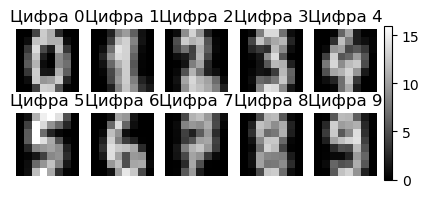

In [133]:
### import matplotlib.pyplot as plt  # библиотека для построения графиков

gridsize = (2, 5)  # размер сетки
fig, ax_arr = plt.subplots(gridsize[0], gridsize[1], figsize=(5, 2))  # размер полотна

# Проходим по словарю средних значений
for i, (key, avg_image) in enumerate(info_average_digits.items()):
    ax = ax_arr[i // gridsize[1], i % gridsize[1]]  # выбираем подграфик
    image = ax.imshow(avg_image.reshape(8, 8), cmap='gray', vmin = 0, vmax = 16)  # отображаем средние изображения
    ax.set_title(f'Цифра {key}')  # устанавливаем названия для подграфиков
    ax.axis('off')  # убираем оси

# Добавляем один общий colorbar
fig.colorbar(image, ax=ax_arr, fraction=0.05, pad=0.02)

plt.show()  # вывод графиков


In [134]:
import pandas as pd # Импортируем библиотеки для таблиц
# Cтроим таблицу DataFrame
digits_table = pd.DataFrame(columns = ['Число примеров', 'Максимальная сумма значений всех пикселей', 
                                       'Минимальная сумма значений всех пикселей'],
                            index = [np.arange(10)])
# Создаем столбцы, и присваиваем им значения цифр в словарях
digits_table['Число примеров'] = info_count_digits.values()
digits_table['Максимальная сумма значений всех пикселей'] = max_sum_digits.values()
digits_table['Минимальная сумма значений всех пикселей'] = min_sum_digits.values()
digits_table

,Число примеров,Максимальная сумма значений всех пикселей,Минимальная сумма значений всех пикселей
0,100,405.0,259.0
1,100,433.0,226.0
2,97,368.0,257.0
3,101,371.0,257.0
4,94,359.0,247.0
5,118,376.0,226.0
6,100,395.0,256.0
7,87,359.0,251.0
8,99,409.0,256.0
9,104,398.0,257.0


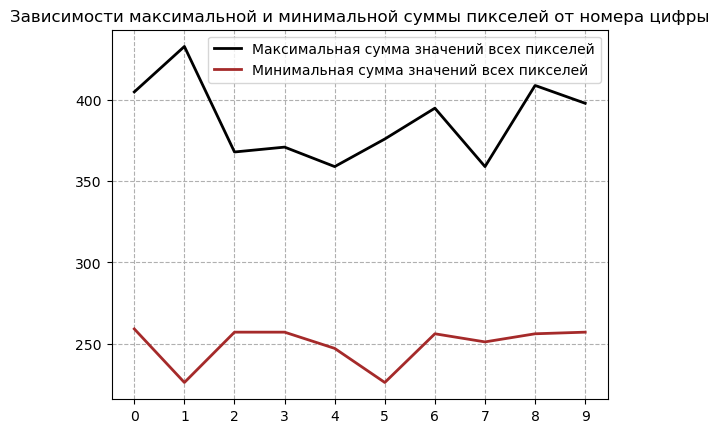

In [180]:
# Создаем графики, задаем толщину и цвет
digits_table['Максимальная сумма значений всех пикселей'].plot(linewidth = 2, color = 'black') 
digits_table['Минимальная сумма значений всех пикселей'].plot(linewidth = 2, color = 'brown')

# Заполняем ось X всеми цифрами
plt.xticks(np.arange(len(values)), values)

ax = plt.gca() # Получаем текущий объект Axes, на который ссылается plot

# Устанавливаем название для графика
ax.set_title('Зависимости максимальной и минимальной суммы пикселей от номера цифры')
ax.grid(True, linestyle = '--') # Устанавливаем сетку
ax.legend() # Устанавливаем легенду

plt.show() # Выводим все